In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load data
dow_jones = pd.read_csv("dow_jones_index.data")
columns_to_change = ["open", "high", "low", "close","next_weeks_open", "next_weeks_close"]

# Change numeric columns to float for later manipulation and/or visualization

for column in columns_to_change:
    dow_jones[column] = dow_jones[column].replace({"\$": ""}, regex=True).astype(float)

# Printing unique values in the stock column to confirm that it contains 30 unique stocks as dow jones should
print(dow_jones["stock"].nunique())
print("********************************************************************************************************")

na_indices = dow_jones[dow_jones.isna().any(axis=1)].index
na_rows = dow_jones.iloc[na_indices]

# Visually inspect which rows and columns contain the missing values, upon inspection i see that its the first date of the data for every stock in the 
# "percent_change_volume_over_last_wk" and "previous_weeks_volume" which is logical but we need to make decision on wether to keep these rows or drop them. 

print(na_rows)

30
********************************************************************************************************
     quarter stock      date    open    high     low   close      volume  \
0          1    AA  1/7/2011   15.82   16.72   15.78   16.42   239655616   
12         1   AXP  1/7/2011   43.30   45.60   43.11   44.36    45102042   
24         1    BA  1/7/2011   66.15   70.10   66.00   69.38    36258120   
36         1   BAC  1/7/2011   13.85   14.69   13.80   14.25  1453438639   
48         1   CAT  1/7/2011   94.38   94.81   92.30   93.73    24135903   
60         1  CSCO  1/7/2011   20.45   21.00   20.38   20.97   303545878   
72         1   CVX  1/7/2011   91.66   92.48   90.27   91.19    35556288   
84         1    DD  1/7/2011   50.05   50.54   49.28   49.76    27658789   
96         1   DIS  1/7/2011   37.74   40.00   37.62   39.45    72917621   
108        1    GE  1/7/2011   18.49   18.72   18.12   18.43   280146510   
120        1    HD  1/7/2011   35.20   35.57   34.18   3

<>:8: SyntaxWarning: invalid escape sequence '\$'
<>:8: SyntaxWarning: invalid escape sequence '\$'
C:\Users\victo\AppData\Local\Temp\ipykernel_3112\2952834537.py:8: SyntaxWarning: invalid escape sequence '\$'
  dow_jones[column] = dow_jones[column].replace({"\$": ""}, regex=True).astype(float)


In [3]:
dow_jones['close'].describe()

count    750.000000
mean      53.729267
std       32.788787
min       10.520000
25%       30.365000
50%       45.930000
75%       72.667500
max      170.580000
Name: close, dtype: float64

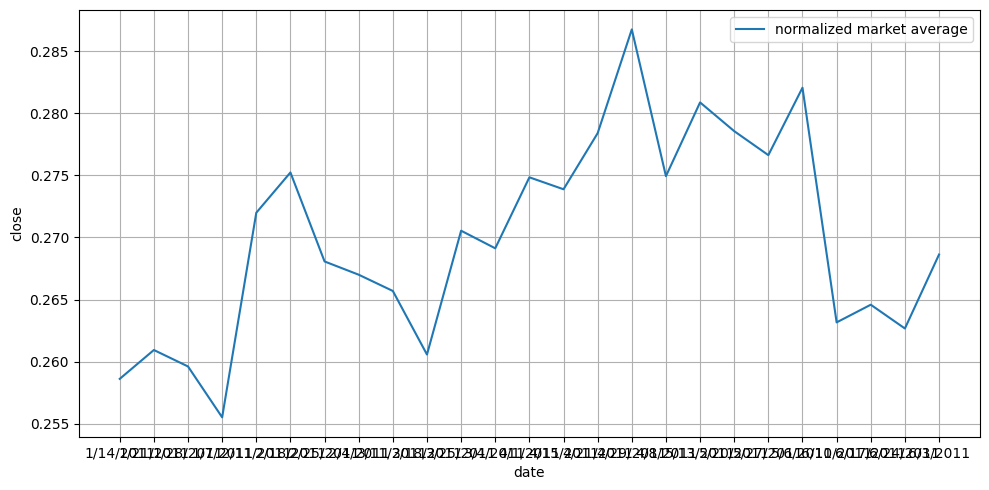

In [15]:
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(np.array(dow_jones['close']).reshape(-1, 1))
dow_jones = dow_jones.assign(close=scaled_data)

close_df = dow_jones[['date', 'close']]
close_df = close_df.groupby(by=['date']).mean()

fig, ax = plt.subplots(1,1, figsize = (10, 5))
sns.lineplot(data=close_df, x=close_df.index, y='close', ax=ax, label='normalized market average')
ax.legend()
ax.grid()
plt.tight_layout()
plt.show()